<a href="https://colab.research.google.com/github/smu-linear-algebra2/mj/blob/main/5%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


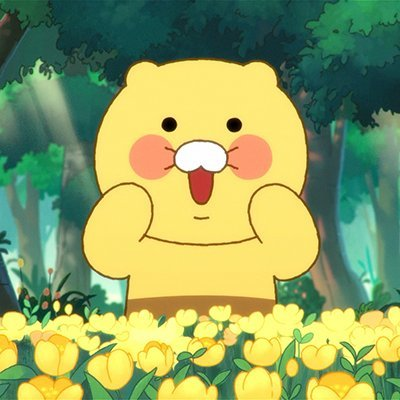

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#이미지를 컬러로 로드하여 넘파이 배열 형태로 img에 대입
img=cv2.imread('/content/gdrive/My Drive/Cn2MUfHG_400x400.jpg',cv2.IMREAD_COLOR)
#이미지가 저장된 넘파이 배열과 너비의 높이를 구한다.
height, width=img.shape[:2]
#45도 라디안으로 변환하여 코사인값과 사인값을 구한다.
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
#회전 변환행렬을 구성한다.
#opencv의 원점이 왼쪽 아래가 아니라, 왼쪽 위라서 [[c,-s,0],[s,c,0]]가 아니라 [[c,s,0],[-s,c,0]]이다.
rotation_matrix=np.array([[c,s,0],[-s,c,0],[0,0,1]],dtype=float)
dst=np.zeros(img.shape,dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    #backward mapping
    #결과 이미지의 픽셀 new_p로 이동하는 입력 이미지의 픽셀 old_p의 위치를 계산한다.
    new_p=np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p=np.dot(inv_rotation_matrix,new_p)
    #new_p의 위치에 계산하여 얻은 old_p 픽셀의 값을 대입한다.
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    #입력 이미지의 픽셀을 가져올 수 있는 경우에만 결과 이미지의 현재 위치 픽셀로 사용한다.
    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y,x]=img[y_,x_]
result=cv2.hconcat([img,dst])
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
import numpy as np
A=np.array([10])
B=np.array([[1,2],[3,4]])
C=np.array([[1,2,3],[4,5,6],[7,8,9]])
#np.linalg.det(A)
print(np.linalg.det(B))
print(np.linalg.det(C))

-2.0000000000000004
0.0


4.0


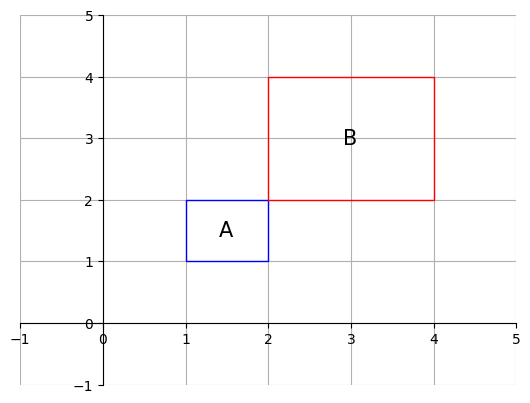

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
points=np.array([[1,1],[1,2],[2,2],[2,1]])
A=np.array([[2,0],[0,2]])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
print(np.linalg.det(A))

ax.add_patch(patches.Polygon(points,fill=False,color='blue',zorder=1))
ax.add_patch(patches.Polygon(np.dot(points,A),fill=False,color='red',zorder=2))
ax.text(1.4,1.4,'A',size=15)
ax.text(2.9,2.9,'B',size=15)
ax.set_xticks(range(-1,6))
ax.set_yticks(range(-1,6))
ax.grid()
ax.set_axisbelow(True)
ax.set_aspect('auto', adjustable='box')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [ ]:
import numpy as np
A=np.array([[3,2],[4,1]])
print("A")
print(A)
print()
eigenvalue, eigenvector=np.linalg.eig(A)
print("Eigne-Value")
print(eigenvalue)
print("Eigen-Vector")
print(eigenvector)
print()
#고유벡터는 eigenvector의 열벡터이다
eigenvector1=eigenvector[:,0]
eigenvector2=eigenvector[:,1]
eigenvalue1=eigenvalue[0]
eigenvalue2=eigenvalue[1]
#Lambda*eigenvector와 A*eigenvector가 같음을 확인한다
print("lambda*eigenvector==A*eigenvector")
print(eigenvalue1*eigenvector1,np.dot(A,eigenvector1))
print(eigenvalue2*eigenvector2,np.dot(A,eigenvector2))

A
[[3 2]
 [4 1]]

Eigne-Value
[ 5. -1.]
Eigen-Vector
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]

lambda*eigenvector==A*eigenvector
[3.53553391 3.53553391] [3.53553391 3.53553391]
[ 0.4472136  -0.89442719] [ 0.4472136  -0.89442719]


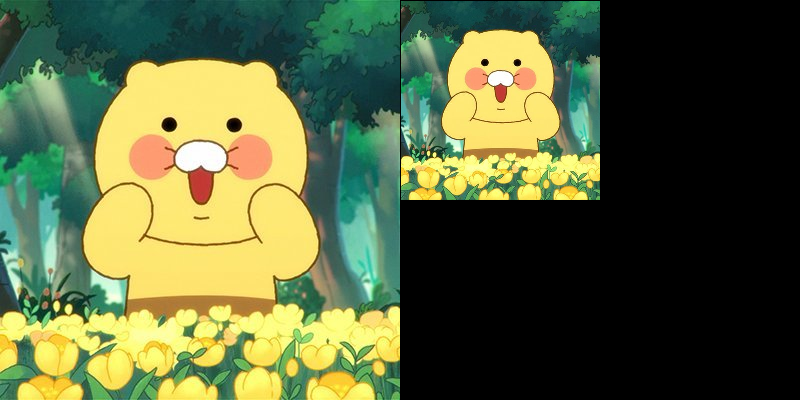

In [ ]:
import cv2
import numpy as np
img=cv2.imread('/content/gdrive/My Drive/Cn2MUfHG_400x400.jpg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))

result=cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
img=cv2.imread('/content/gdrive/My Drive/Cn2MUfHG_400x400.jpg',cv2.IMREAD_COLOR0)
height, width=img.shape[:2]
dst=cv2.resize(img,(int(width*1.5),int(height*1.5)))

cv2_imshow(img)
cv2.waitKey(0)

AttributeError: module 'cv2' has no attribute 'IMREAD_COLOR0'

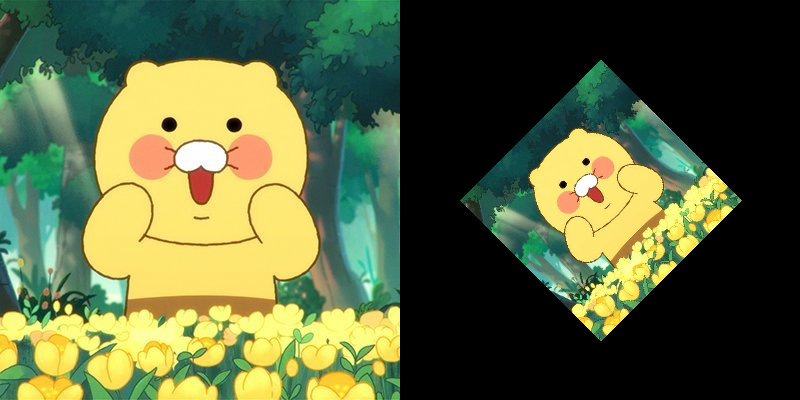

-1

In [ ]:
import cv2
import numpy as np
img=cv2.imread('/content/gdrive/My Drive/Cn2MUfHG_400x400.jpg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])

T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_matrix,T)
T=np.dot(rotation_matrix,T)
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(T)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))

result=cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)